In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import koreanize_matplotlib
data_file = '../data/iris.csv'
df = pd.read_csv(data_file, names=["sepal_length","sepal_width","petal_length","petal_width","class"])

In [70]:
df=df[df.duplicated()==False]
df.reset_index(drop=True,inplace=True)
x=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df["class"]

In [71]:
model = KNeighborsClassifier()
model.fit(x,y) 

KNeighborsClassifier()

In [72]:
model.score(x,y) # 96.6% 의 정확도 

0.9659863945578231

In [73]:
# 없는 값 집어넣기 
new_data=pd.DataFrame([[5.1,4.8,1.2,0.1]], columns=model.feature_names_in_)
model.predict(new_data) 

array(['Iris-setosa'], dtype=object)

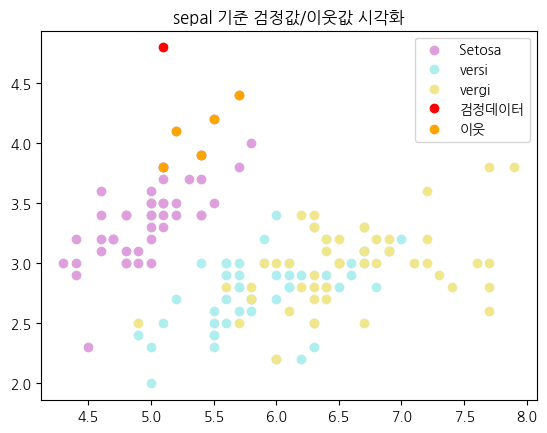

In [74]:
# sepal 기준 이웃값 출력 
setosa=df[df["class"]=="Iris-setosa"]
versi=df[df["class"]=="Iris-versicolor"]
vergi=df[df["class"]=="Iris-virginica"]
# x 출력
plt.scatter(setosa["sepal_length"],setosa["sepal_width"], color="plum", label="Setosa")
plt.scatter(versi["sepal_length"],versi["sepal_width"], color="paleturquoise", label="versi")
plt.scatter(vergi["sepal_length"],vergi["sepal_width"], color="khaki", label="vergi")

# 테스트 값(입력) 출력
plt.plot(new_data.sepal_length.to_list()[0],new_data.sepal_width.to_list()[0],"ro", label="검정데이터")

# 근접값 출력
_,index = model.kneighbors(new_data)
plt.scatter(x.loc[index[0]].sepal_length.to_list(),x.loc[index[0]].sepal_width.to_list(),c="orange",marker="o",label="이웃")
plt.title("sepal 기준 검정값/이웃값 시각화")
plt.legend()
plt.show()

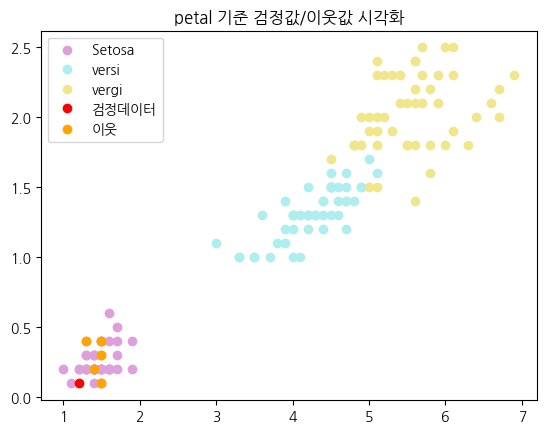

In [75]:
# petal 기준 이웃값 출력 
setosa=df[df["class"]=="Iris-setosa"]
versi=df[df["class"]=="Iris-versicolor"]
vergi=df[df["class"]=="Iris-virginica"]
# x 출력
plt.scatter(setosa["petal_length"],setosa["petal_width"], color="plum", label="Setosa")
plt.scatter(versi["petal_length"],versi["petal_width"], color="paleturquoise", label="versi")
plt.scatter(vergi["petal_length"],vergi["petal_width"], color="khaki", label="vergi")

# 테스트 값(입력) 출력
plt.plot(new_data.petal_length.to_list()[0],new_data.petal_width.to_list()[0],"ro", label="검정데이터")

# 근접값 출력
_,index = model.kneighbors(new_data)
plt.scatter(x.loc[index[0]].petal_length.to_list(),x.loc[index[0]].petal_width.to_list(),c="orange",marker="o",label="이웃")
plt.title("petal 기준 검정값/이웃값 시각화")
plt.legend()
plt.show()